In [1]:
import pickle
import pandas as pd
with open('model\lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

with open('model/id2word.pkl', 'rb') as f:
   id2word = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
list_topic

[[0.105415784, 0.5949769, 0.038971115, 0.019431762, 0.20626561, 0.034938782],
 [0.021803983, 0.7286133, 0.08644843, 0.04766653, 0.09426342, 0.021204328],
 [0.26367316, 0.067499205, 0.016983742, 0.010221053, 0.63116556, 0.010457289],
 [0.030103633, 0.8344582, 0.025838463, 0.035842694, 0.04812232, 0.025634728],
 [0.10086028, 0.03863007, 0.13333, 0.18557376, 0.47956076, 0.062045094],
 [0.036130495, 0.035712153, 0.039049547, 0.77547324, 0.038657516, 0.07497706],
 [0.09577929, 0.023760289, 0.1571892, 0.0907011, 0.6069464, 0.02562371],
 [0.08718162, 0.14871442, 0.16805159, 0.289674, 0.13846053, 0.16791783],
 [0.011046094, 0.8607508, 0.066606835, 0.023635583, 0.025707312, 0.012253386],
 [0.01643985, 0.03581878, 0.11826311, 0.628621, 0.18612665, 0.0147306165],
 [0.11149434, 0.047336645, 0.07577773, 0.29721224, 0.056314625, 0.4118644],
 [0.07134007, 0.34241655, 0.28944737, 0.08872229, 0.063641325, 0.14443238],
 [0.21750763, 0.07775731, 0.22535823, 0.09701593, 0.08176465, 0.30059627],
 [0.019638

In [2]:
distribution_0 = []
distribution_1 = []
distribution_2 = []
distribution_3 = []
distribution_4 = []
distribution_5 = []
for topic_each_doc in list_topic:
    topic_each_doc.sort()
    distribution_0.append(topic_each_doc[5])
    distribution_1.append(topic_each_doc[4])
    distribution_2.append(topic_each_doc[3])
    distribution_3.append(topic_each_doc[2])
    distribution_4.append(topic_each_doc[1])
    distribution_5.append(topic_each_doc[0])

In [9]:
print(f"min_0 = {min(distribution_0)} max_0 = {max(distribution_0)}")
print(f"min_1 = {min(distribution_1)} max_1 = {max(distribution_1)}")
print(f"min_2 = {min(distribution_2)} max_2 = {max(distribution_2)}")
print(f"min_3 = {min(distribution_3)} max_3 = {max(distribution_3)}")
print(f"min_4 = {min(distribution_4)} max_4 = {max(distribution_4)}")
print(f"min_5 = {min(distribution_5)} max_5 = {max(distribution_5)}")

min_0 = 0.20220807194709778 max_0 = 0.9669764637947083
min_1 = 0.01049822848290205 max_1 = 0.4726931154727936
min_2 = 0 max_2 = 0.2909800708293915
min_3 = 0 max_3 = 0.21359257400035858
min_4 = 0 max_4 = 0.14678996801376343
min_5 = 0 max_5 = 0.1458280235528946


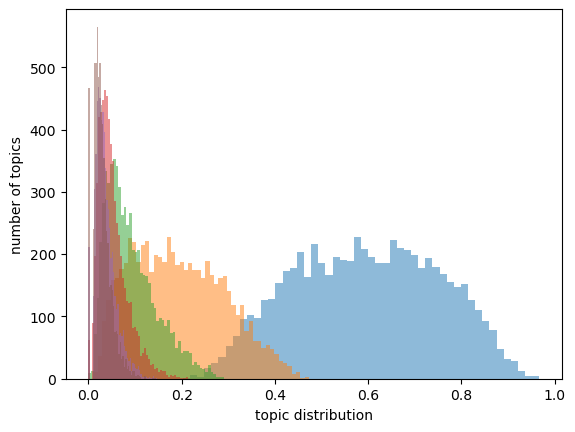

In [4]:
import matplotlib.pyplot as plt
num_bins = 50
label = ['0','1','2','3','4','5']
plt.hist(distribution_0, num_bins, alpha=0.5)
plt.hist(distribution_1, num_bins, alpha=0.5)
plt.hist(distribution_2, num_bins, alpha=0.5)
plt.hist(distribution_3, num_bins, alpha=0.5)
plt.hist(distribution_4, num_bins, alpha=0.5)
plt.hist(distribution_5, num_bins, alpha=0.5)
plt.xlabel('topic distribution')
plt.ylabel('number of topics')
plt.show()

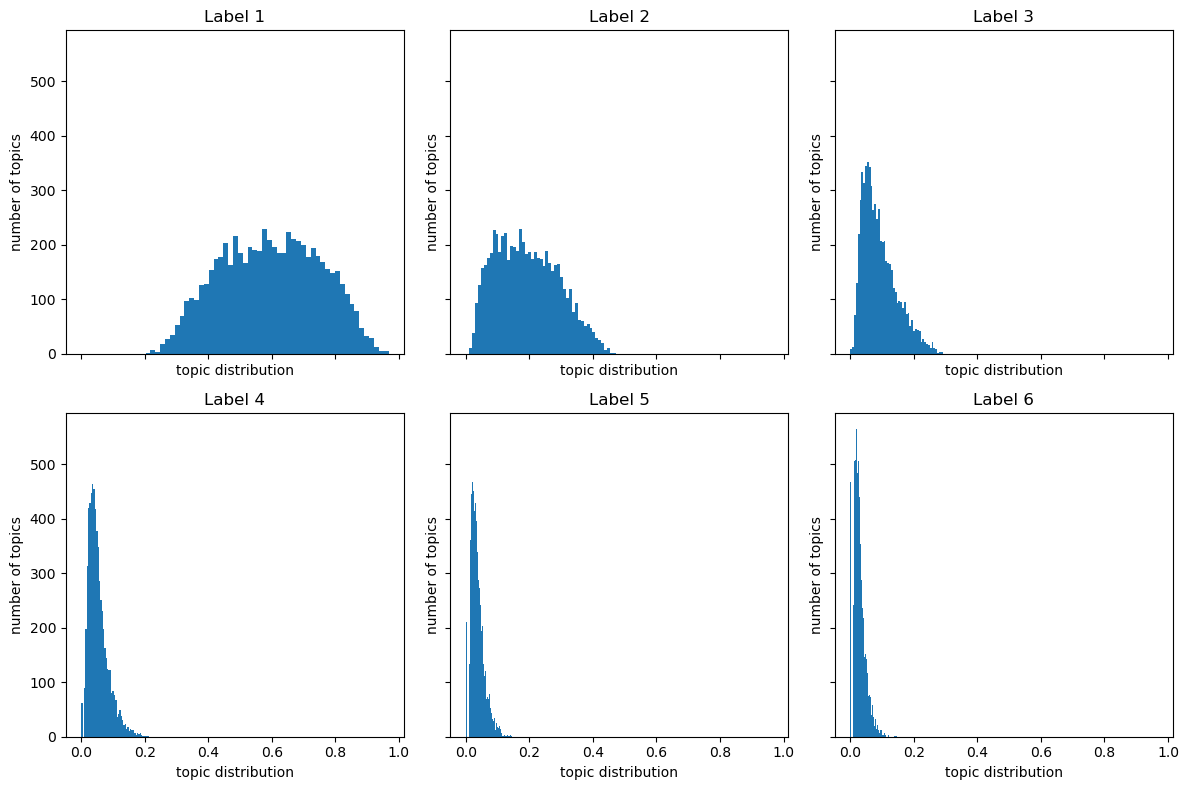

In [11]:
# Define the number of bins and labels
num_bins = 50
# labels = ['succession', 'violation', 'family', 'criminal', 'contract', 'labor']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True, sharex=True)

# Plot each histogram in a separate subplot
axes[0, 0].hist(distribution_0, num_bins)
axes[0, 0].set_xlabel('topic distribution')
axes[0, 0].set_ylabel('number of topics')
axes[0, 0].set_title('Label 1')

axes[0, 1].hist(distribution_1, num_bins)
axes[0, 1].set_xlabel('topic distribution')
axes[0, 1].set_ylabel('number of topics')
axes[0, 1].set_title('Label 2')

axes[0, 2].hist(distribution_2, num_bins)
axes[0, 2].set_xlabel('topic distribution')
axes[0, 2].set_ylabel('number of topics')
axes[0, 2].set_title('Label 3')

axes[1, 0].hist(distribution_3, num_bins)
axes[1, 0].set_xlabel('topic distribution')
axes[1, 0].set_ylabel('number of topics')
axes[1, 0].set_title('Label 4')

axes[1, 1].hist(distribution_4, num_bins)
axes[1, 1].set_xlabel('topic distribution')
axes[1, 1].set_ylabel('number of topics')
axes[1, 1].set_title('Label 5')

axes[1, 2].hist(distribution_5, num_bins)
axes[1, 2].set_xlabel('topic distribution')
axes[1, 2].set_ylabel('number of topics')
axes[1, 2].set_title('Label 6')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

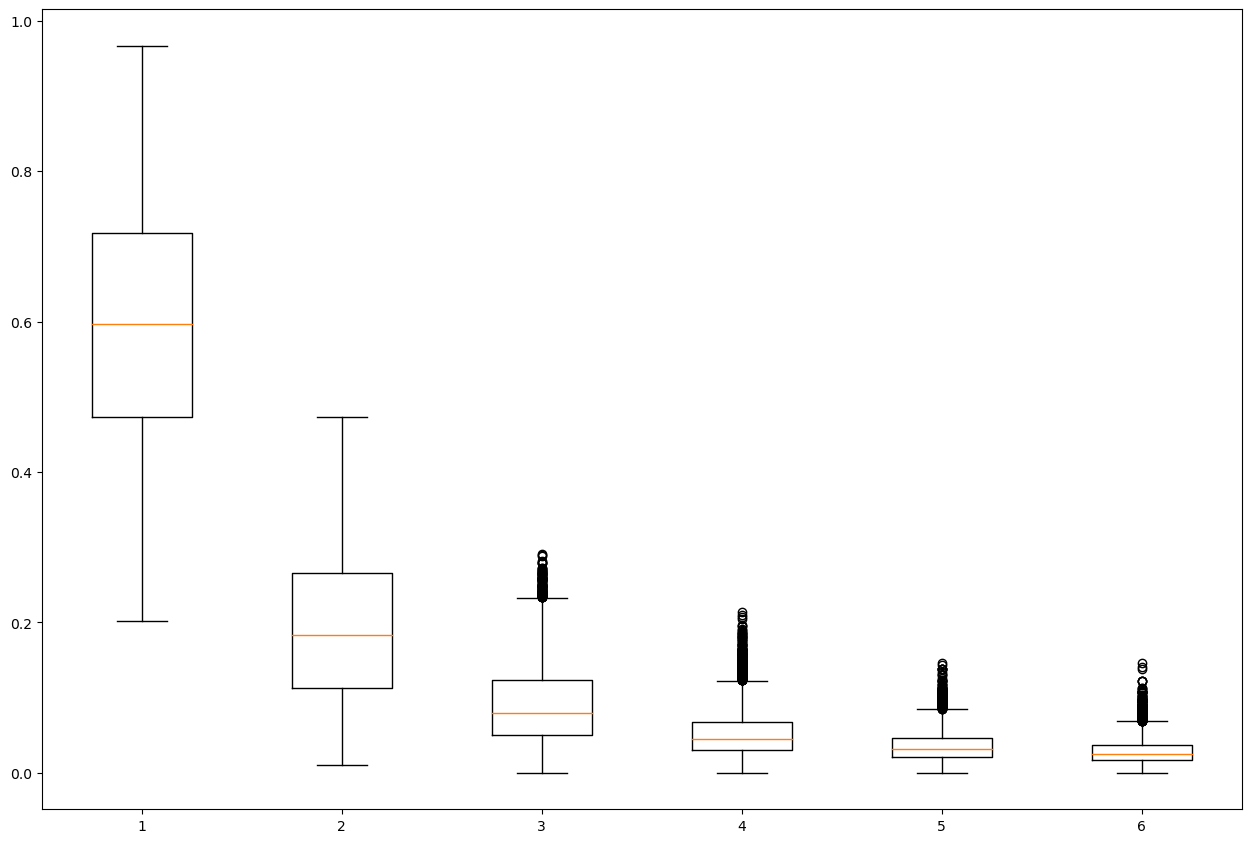

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1])
data = [distribution_0, distribution_1, distribution_2, distribution_3, distribution_4, distribution_5]
bp = ax.boxplot(data)

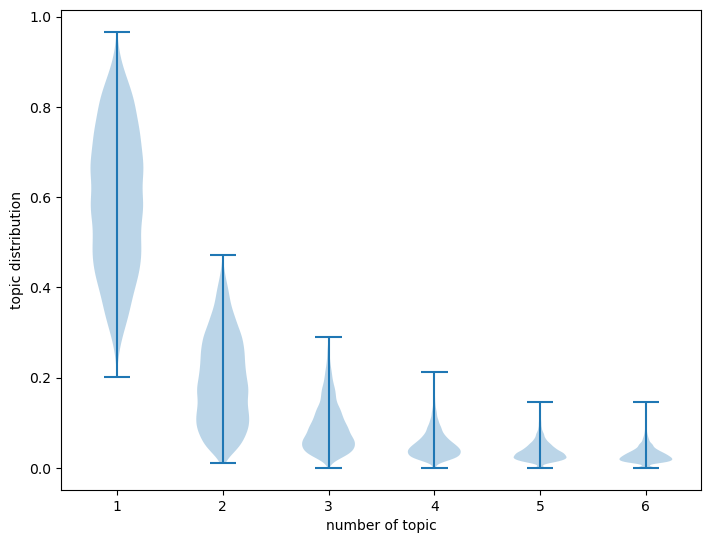

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
vp = ax.violinplot(data)
plt.xlabel('number of topic')
plt.ylabel('topic distribution')
plt.show()

In [ ]:
# question_lda
num_top_topic = []
for each_doc in list_topic:
    count = 0
    for each_topic in each_doc:
        if(each_topic>0.167): count+=1
    num_top_topic.append(count)

count_num_top_topic = [0,0,0,0,0,0,0]
for n in num_top_topic:
    if(n==0): count_num_top_topic[0]+=1
    elif(n==1): count_num_top_topic[1]+=1
    elif(n==2): count_num_top_topic[2]+=1
    elif(n==3): count_num_top_topic[3]+=1
    elif(n==4): count_num_top_topic[4]+=1
    elif(n==5): count_num_top_topic[5]+=1
    elif(n==6): count_num_top_topic[6]+=1
count_num_top_topic

[0, 2689, 3124, 687, 31, 0, 0]

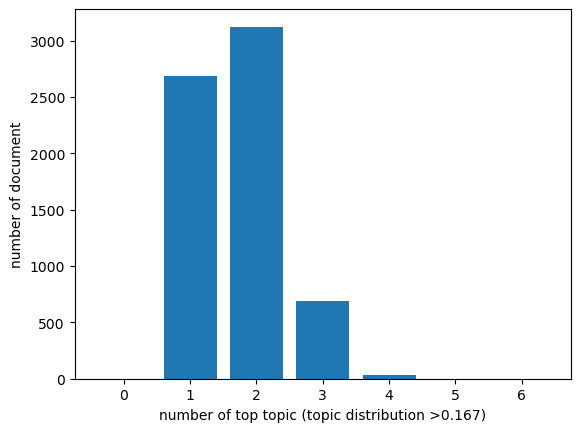

In [ ]:
x = ['0','1','2','3','4','5','6']
y = count_num_top_topic
plt.bar(x, y)
plt.xlabel('number of top topic (topic distribution >0.167)')
plt.ylabel('number of document')
plt.show()

In [ ]:
top_topic=[]
for each_topic in question_lda:
  temp_pred = []
  for topic in each_topic:
    if(topic[1]>0.167): temp_pred.append(1)
    else: temp_pred.append(0)
  top_topic.append(temp_pred)
# y_predict = np.array(y_predict)
pd.DataFrame(top_topic)

,0,1,2,3,4,5
0,0,0,1,0,1,0
1,1,0,1,0,0,0
2,0,0,0,1,1,0
3,1,0,0,0,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
6526,0,0,0,1,1,0
6527,0,0,0,1,1,0
6528,0,0,0,1,1,0
6529,0,0,0,1,0,0


In [ ]:
count_topic_doc = [0,0,0,0,0,0]
for each_topic in top_topic:
    for i in range(6):
        if(each_topic[i]==1): count_topic_doc[i]+=1
count_topic_doc

[2112, 2669, 1199, 855, 3619, 668]

<AxesSubplot:>

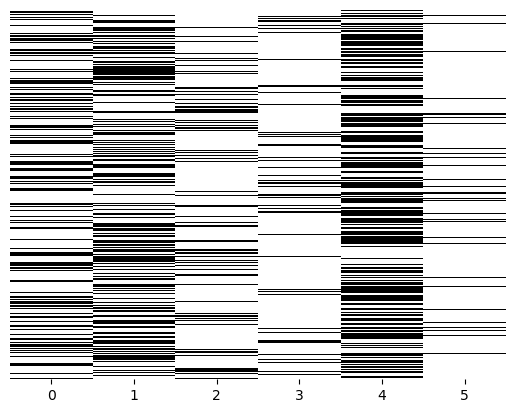

In [ ]:
import seaborn as sns
import numpy as np

data = np.array(top_topic)
sns.heatmap(data, cmap='Greys', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=False, cbar=False)